In [1]:
import pandas as pd
import numpy as np
# 운영체계와 관련된 툴
import os
import glob
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt # matplotlib
# 경고 방지
import warnings 
import librosa
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,15))
plt.style.use('ggplot')

<Figure size 1500x1500 with 0 Axes>

In [2]:
new_path = os.path.join(os.getcwd(), 'data')
dir_path = os.listdir('data')
dir_path
ok_Name = os.path.join(new_path, 'FAN_sound_OK')
err_Name = os.path.join(new_path, 'FAN_sound_error')


In [3]:
glob.glob(err_Name +'/*')

['D:\\IAIA\\Project\\PHM\\data\\FAN_sound_error\\FAN_sound_error_01.wav',
 'D:\\IAIA\\Project\\PHM\\data\\FAN_sound_error\\FAN_sound_error_02.wav',
 'D:\\IAIA\\Project\\PHM\\data\\FAN_sound_error\\FAN_sound_error_03.wav',
 'D:\\IAIA\\Project\\PHM\\data\\FAN_sound_error\\FAN_sound_error_04.wav',
 'D:\\IAIA\\Project\\PHM\\data\\FAN_sound_error\\FAN_sound_error_05.wav',
 'D:\\IAIA\\Project\\PHM\\data\\FAN_sound_error\\FAN_sound_error_06.wav',
 'D:\\IAIA\\Project\\PHM\\data\\FAN_sound_error\\FAN_sound_error_07.wav',
 'D:\\IAIA\\Project\\PHM\\data\\FAN_sound_error\\FAN_sound_error_08.wav',
 'D:\\IAIA\\Project\\PHM\\data\\FAN_sound_error\\FAN_sound_error_09.wav',
 'D:\\IAIA\\Project\\PHM\\data\\FAN_sound_error\\FAN_sound_error_10.wav',
 'D:\\IAIA\\Project\\PHM\\data\\FAN_sound_error\\FAN_sound_error_11.wav',
 'D:\\IAIA\\Project\\PHM\\data\\FAN_sound_error\\FAN_sound_error_12.wav',
 'D:\\IAIA\\Project\\PHM\\data\\FAN_sound_error\\FAN_sound_error_13.wav']

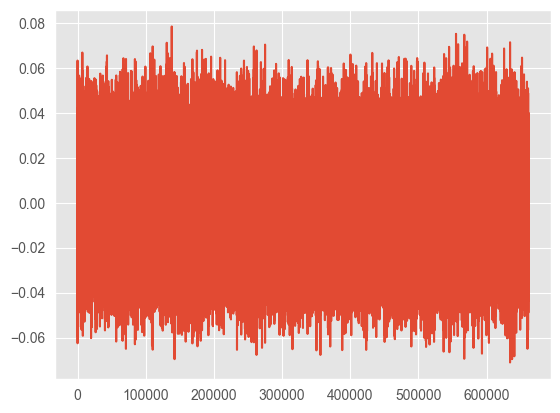

In [10]:
audio_path = glob.glob(err_Name +'/*')[0]

y = librosa.load(audio_path)
plt.plot(y[0])
plt.show()

Text(0.5, 1.0, 'spectrum')

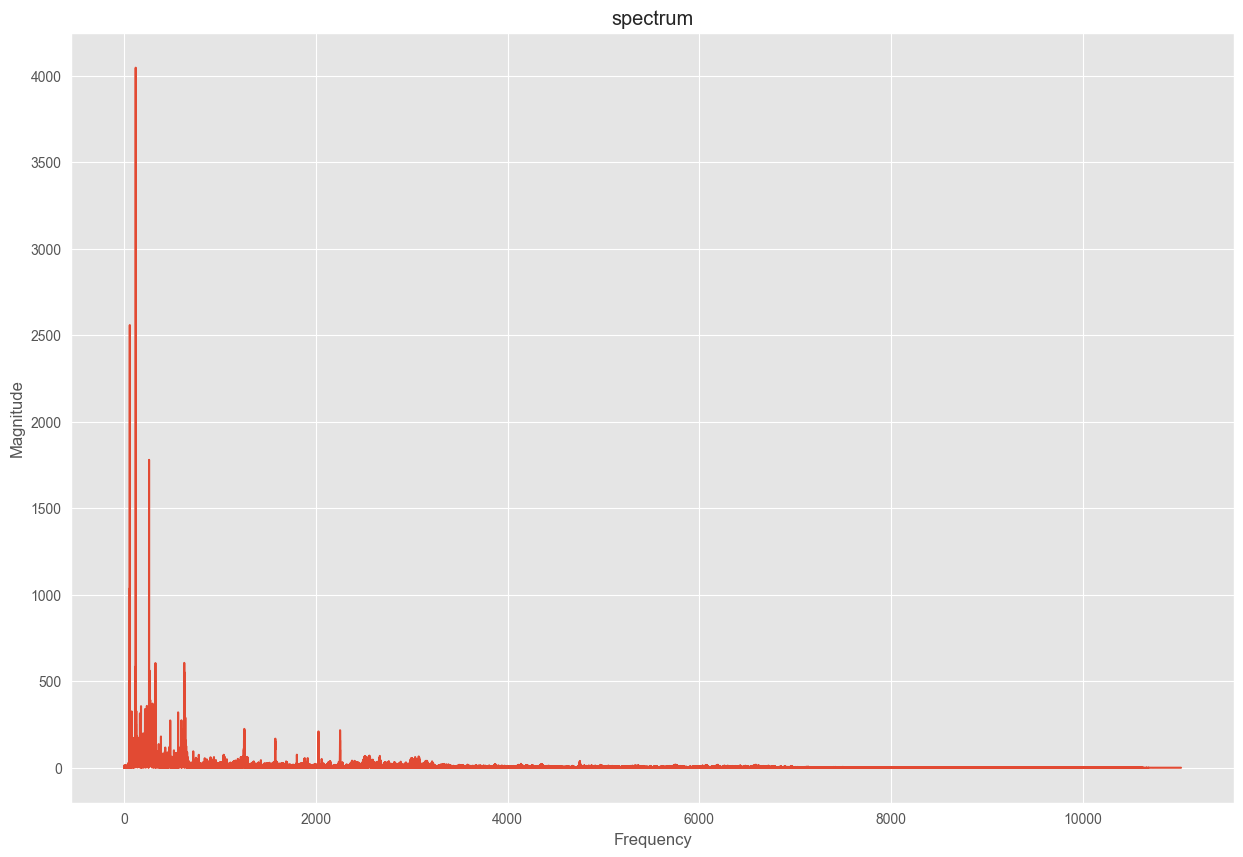

In [11]:
audio_path = glob.glob(ok_Name +'/*')[0]
y, sr = librosa.load(audio_path)
fft = np.fft.fft(y)
magnitude = np.abs(fft)
fre = np.linspace(0 ,sr,len(magnitude))
haf_spectrum = magnitude[:int(len(magnitude)/2)]
haf_fre = fre[:int(len(magnitude)/2)]
plt.figure(figsize=(15 ,10))
plt.plot(haf_fre, haf_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("spectrum")

In [17]:
audio_path = glob.glob(err_Name+'/*')[0]
y, sr = librosa.load(audio_path)
hop_length = 512  # 전체 frame 수
n_fft = 2048  # frame 하나당 sample 수
MFCCs = librosa.feature.mfcc(y, sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13 )
# display MFCCs
plt.figure(figsize=(15 ,10))
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.show()

TypeError: mfcc() takes 0 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given